In [31]:
import import_ipynb
from Seline import MLR, mclp
import pandas as pd

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [8]:
raw_demand = pd.read_csv('./dataset/수요지_데이터셋.csv', index_col=0)
raw_candidate = pd.read_csv('./dataset/후보지_정렬2000.csv', index_col=0)

In [11]:
raw_demand

,cell_x,cell_y,car,population,charger_count,charger_value,building_religion,building_sale,building_edu,building_work,building_factory,public_parking_lot,public_parking_space,tot_count_
0,127.030786,37.362273,20322.0,13,0,1.0,1,0,0,0,0,0,0,90.944
1,127.030798,37.360471,20322.0,0,0,1.0,1,0,0,0,0,0,0,22.332
2,127.031927,37.360475,20322.0,21,0,1.0,1,0,0,0,0,0,0,14.954
3,127.031932,37.359574,20322.0,18,0,1.0,1,0,0,0,0,0,0,10.450
4,127.034124,37.370399,20322.0,0,0,1.0,0,0,0,0,0,0,0,2080.344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,127.421737,37.147743,3607.0,0,0,1.0,0,0,5,0,0,0,0,97.318
10825,127.421738,37.146841,3607.0,0,0,1.0,0,0,5,0,0,0,0,58.772
10826,127.421742,37.143236,3607.0,0,0,1.0,0,0,0,0,0,0,0,106.540
10827,127.421743,37.142334,3607.0,0,0,1.0,0,0,0,0,0,0,0,49.656


In [12]:
raw_candidate

,cell_x,cell_y,cnt_cust*charger_val
0,127.075577,37.229037,345469.765400
1,127.072773,37.326377,281137.608500
2,127.078416,37.326397,157946.033400
3,127.083006,37.312893,138673.965000
4,127.089601,37.345366,114740.448000
...,...,...,...
1995,127.124828,37.299512,591.654180
1996,127.127000,37.316645,590.826000
1997,127.132574,37.098522,590.358000
1998,127.131695,37.279703,590.295343


# 전처리 & 입지선정지수

In [21]:
scaler = StandardScaler()
idx_scaled = scaler.fit_transform(raw_demand)
idx_x = idx_scaled[:,2:-1]
idx_y = idx_scaled[:,-1]

In [19]:
idx_x.head()

,car,population,charger_count,charger_value,building_religion,building_sale,building_edu,building_work,building_factory,public_parking_lot,public_parking_space
0,20322.0,13,0,1.0,1,0,0,0,0,0,0
1,20322.0,0,0,1.0,1,0,0,0,0,0,0
2,20322.0,21,0,1.0,1,0,0,0,0,0,0
3,20322.0,18,0,1.0,1,0,0,0,0,0,0
4,20322.0,0,0,1.0,0,0,0,0,0,0,0


In [27]:
idx_model = MLR(idx_x, idx_y)
idx_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             tot_count_   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     39.00
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           2.29e-83
Time:                        01:20:06   Log-Likelihood:            -1.1013e+05
No. Observations:               10829   AIC:                         2.203e+05
Df Residuals:                   10817   BIC:                         2.204e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.472e+10    2.7e+11      0.055      0.956   -5.14e+11    5.43e+11
car                      0.0190      0.016      1.183      0.237      -0.012       0.051
population               7.0945      0.368     19.254      0.000       6.372       7.817
charger_count        -3.485e+06   6.38e+07     -0.055      0.956   -1.29e+08    1.22e+08
charger_value        -1.472e+10    2.7e+11     -0.055      0.956   -5.43e+11    5.14e+11
building_religion      -34.8419     47.098     -0.740      0.459    -127.162      57.479
building_sale           29.5852     84.600      0.350      0.727    -136.246     195.416
building_edu             7.3065     14.859      0.492      0.623     -21.821      36.434
building_work          -44.7817     39.500     -1.134      0.257    -122.209      32.646
building_factory        27.9686     10.046      2.784      0.005       8.277      47.660
public_parking_lot     -64.7020     97.834     -0.661      0.508    -256.475     127.071
public_parking_space     1.1306      0.597      1.895      0.058      -0.039       2.300
==============================================================================
Omnibus:                    29533.787   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1198195918.513
Skew:                          33.860   Prob(JB):                         0.00
Kurtosis:                    1631.171   Cond. No.                     7.82e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.75e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<AxesSubplot:>

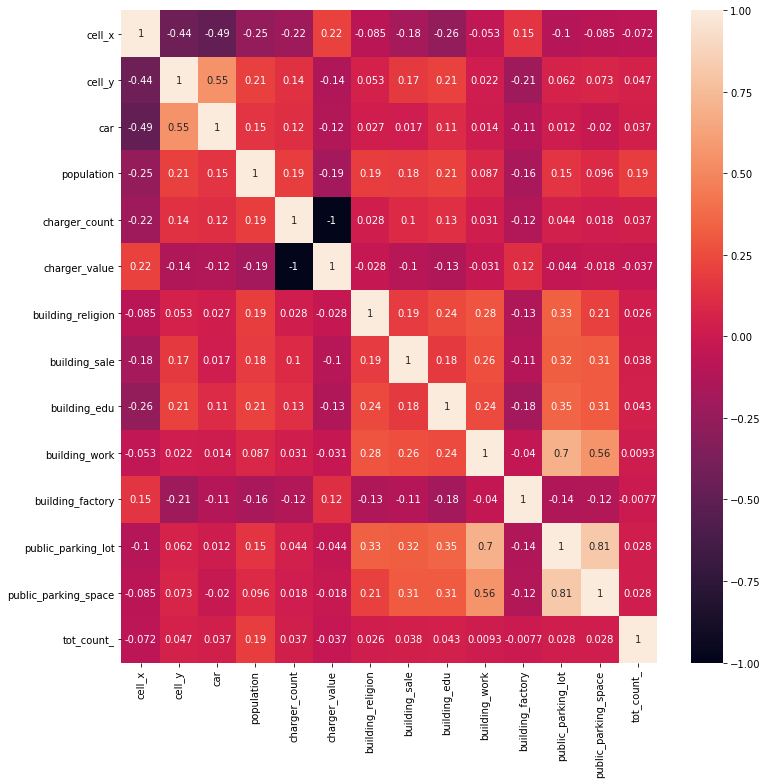

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(raw_demand.corr(), annot=True)